# TP3 - Intégration numérique
- $m_1$ : CLARY Émilie
- $m_2$ : VAN BOXEM Rémi

Posons notre petite région cacahuétoïdale :
$f(x,y,z) = ((0,05-x)^2+y^2+z^2+1)^2 -5x^2-2$ 

Vérifiant la condition suivante : $f(x,y,z) \leq 0$

In [1]:
x, y, z = var('x y z')
f(x, y, z) = ((0.05 - x)^2 + y^2 + z^2 + 1)^2 - 5*x^2 -2
show(f)
# help(plot)
implicit_plot3d(f,(-2,2),(-1,1),(-1,1),adaptive=True)

(x, y, z) |--> ((x - 0.0500000000000000)^2 + y^2 + z^2 + 1)^2 - 5*x^2 - 2

Graphics3d Object

## Monte-Carlo, pt.1

Définissons la méthode `MC3D(n)`.
Cette dernière génère $n$ points aléatoires contenus dans un pavé $P$ qui contient notre célébrissime cacahuétoïdale $S$. La fonction effectue après combien de points $m$ il y a dans $S$. Suite à cela, la fonction renvoie $\frac{m}{n}\times vol(P)$ 

Pour faciliter les calculs, on va considérer un pavé $P$ avec les dimensions qui suit : $x, y \in [-2,2]^2$ et $z \in [-1,1]$

In [2]:
def MC3D(n):
    show("Méthode de Monte-Carlo avec ", n, "points.")
    points = [] # Tableau qui contiendra nos n points
    m = [] # Point étant dans la cacahouete
    graph = 0 # Graphique


    # Génération des points puis test de la condition
    for i in range (n):
        gen_point = (uniform(-2,2),uniform(-1,1),uniform(-1,1))
        if f(gen_point[0],gen_point[1],gen_point[2]) <= 0:
            m.append(gen_point)
        else:
            points.append(gen_point)

    # Établissement du volume potentiel de la cacahouète
    volP = 4*2*2 # L * l * h
    result = len(m)/n*volP

    # Génération du graphique
    for dot in points:
        graph += point((dot[0],dot[1],dot[2]), color ="red")

    for dot in m:
        graph += point((dot[0],dot[1],dot[2]), color ="blue")

    show(graph)
    
    return result

show("Le volume approximatif est :", MC3D(2000))

'Méthode de Monte-Carlo avec ' 2000 'points.'

Graphics3d Object

'Le volume approximatif est :' 689/125

## Monte-Carlo, pt. 2

Définissons la méthode `MC2D(n)`.
Cette dernière génère $n$ points aléatoires contenus dans un rectangle $R$ qui contient notre fameuse cacahuétoïdale $S$ en 2D. La fonction effectue après combien de points $m$ il y a dans $S$. Suite à cela, la fonction renvoie $\frac{aire(R)}{n}\sum_i g(P_i)$. 

Pour faciliter les calculs, on va considérer un pavé $P$ avec les dimensions qui suit : $x, y \in [-2,2]^2$ et $z \in [-1,1]$

(x, y) |--> ((x - 0.0500000000000000)^2 + y^2 + 1)^2 - 5*x^2 - 2

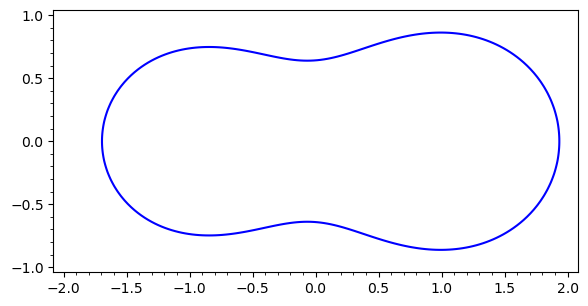

In [3]:
x, y = var('x y') # Redéfinition des variables
g(x, y) = ((0.05 - x)^2 + y^2 + 1)^2 - 5*x^2 -2
show(g)
# help(plot)
implicit_plot(g,(x,-2,2),(y,-1,1))

'Méthode de Monte-Carlo avec ' 2000 'points.'

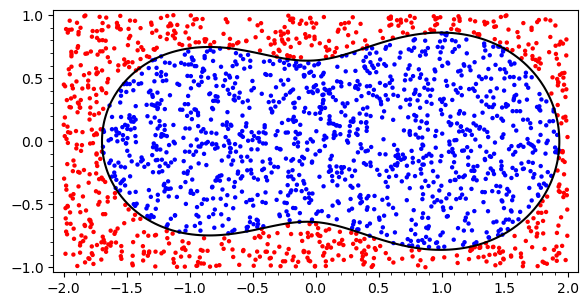

'Le volume approximatif est :' 7.77950786867995

In [4]:
def MC2D(n):
    show("Méthode de Monte-Carlo avec ",n, "points.")
    points = [] # Tableau qui contiendra nos n points
    m = [] # Point étant dans la cacahouete
    graph = implicit_plot(g,(x,-2,2),(y,-1,1), color = "black") # Graphique


    # Génération des points puis test de la condition
    for i in range (n):
        gen_point = (uniform(-2,2),uniform(-1,1))
        if g(gen_point[0],gen_point[1]) <= 0:
            m.append(gen_point)
        else:
            points.append(gen_point)

    # Établissement du volume potentiel de la cacahouète
    aire_r = 4*2 # L * l * h
    result = aire_r/n
    temp = 0
    for dot in m:
        temp += g(dot[0],dot[1])

    result *= abs(temp)

    # Génération du graphique

    for dot in points:
        graph += point(dot, color ="red")

    for dot in m:
        graph += point(dot, color ="blue")

    show(graph)
    
    return result

show("Le volume approximatif est :", MC2D(2000))

## Maillage rectangulaire (sommes de Riemann)

In [5]:
def Riemann(m,n):
    val_x = 4/m
    val_y = 2/n
    mns = [] # Point étant dans la cacahouete
    points = [] # Tableau qui contiendra nos n points

    for i in range(m+1):
        for j in range(n+1):
            gen_point = (((val_x * i)-2,(val_y * j) -1))
            if g(gen_point[0],gen_point[1]) <= 0:
                mns.append(gen_point)
            else:
                points.append(gen_point)


    graph = implicit_plot(g,(x,-2,2),(y,-1,1), color = "black") # Graphique



    # Établissement du volume potentiel de la cacahouète
    aire_r = 4*2 # L * l
    result = aire_r/n
    temp = 0
    for dot in mns:
        temp += g(dot[0],dot[1])

    result *= abs(temp)

    # Génération du graphique

    for dot in points:
        graph += point(dot, color ="red")

    for dot in mns:
        graph += point(dot, color ="blue")

    show(graph)
    
    return result

show("Le volume approximatif est :", Riemann(500,200))